# 💳 Bank Loan Analysis with Python
This notebook reproduces key metrics and visual insights from a bank loan dataset using **Pandas**, **Matplotlib**, and **Seaborn**, based on previously implemented SQL logic.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style='whitegrid')

## 📥 Load Data

In [4]:
# Load the CSV file (replace with your path)
df = pd.read_csv('financial_loan.csv', parse_dates=['issue_date'])
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## 📊 Key KPIs

In [5]:
# Total Loan Applications
total_loans = df['id'].nunique()
print('Total Loan Applications:', total_loans)

Total Loan Applications: 38576


In [6]:
# Total Funded Amount
total_funded = df['loan_amount'].sum()
print('Total Funded Amount:', total_funded)

Total Funded Amount: 435757075


In [7]:
# Total Amount Received
total_received = df['total_payment'].sum()
print('Total Amount Received:', total_received)

Total Amount Received: 473070933


In [8]:
# Average Interest Rate and DTI
avg_interest = df['int_rate'].mean() * 100
avg_dti = df['dti'].mean() * 100
print(f'Average Interest Rate: {avg_interest:.2f}%')
print(f'Average DTI: {avg_dti:.2f}%')

Average Interest Rate: 12.05%
Average DTI: 13.33%


## 📅 MTD / PMTD Metrics

In [10]:
# Convert to datetime format
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

# Extract month and year
df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

# Filter MTD and PMTD
mtd = df[(df['month'] == 12) & (df['year'] == 2021)]
pmtd = df[(df['month'] == 11) & (df['year'] == 2021)]

# Output results
print('MTD Applications:', mtd['id'].nunique())
print('PMTD Applications:', pmtd['id'].nunique())


MTD Applications: 1
PMTD Applications: 20850


## ✅ Good vs ❌ Bad Loan Analysis

In [11]:
total = df.shape[0]
good = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
bad = df[df['loan_status'] == 'Charged Off']

good_pct = (len(good) / total) * 100
bad_pct = (len(bad) / total) * 100

print(f'Good Loans: {good_pct:.2f}%')
print(f'Bad Loans: {bad_pct:.2f}%')

Good Loans: 86.18%
Bad Loans: 13.82%


## 📈 Monthly Trend of Applications and Payments

In [12]:
monthly = df.groupby(df['issue_date'].dt.month).agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={'id': 'Total_Applications'})
display(monthly)

,Total_Applications,loan_amount,total_payment
issue_date,,,
1.0,2,6500,7774
2.0,3,32050,18549
5.0,1,12000,3522
7.0,251,2219275,2212690
8.0,1561,14385275,14065428
9.0,4706,46295750,50344561
10.0,11197,119568600,128148384
11.0,20850,253208725,278237119
12.0,1,5000,5863


## 📊 Visualizations

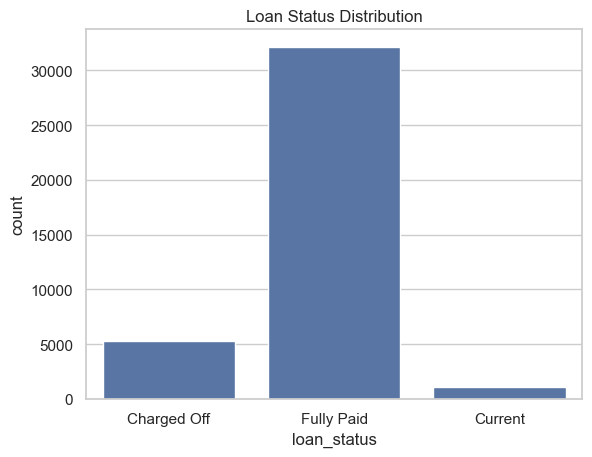

In [13]:
# Loan Status Distribution
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

1. MTD vs PMTD Loan Applications

C:\Users\Owner\AppData\Local\Temp\ipykernel_3508\96775830.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(apps.keys()), y=list(apps.values()), palette='Blues_d')


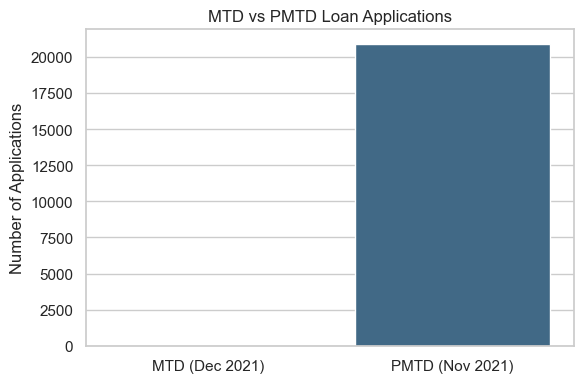

In [14]:
apps = {
    'MTD (Dec 2021)': mtd['id'].nunique(),
    'PMTD (Nov 2021)': pmtd['id'].nunique()
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(apps.keys()), y=list(apps.values()), palette='Blues_d')
plt.title('MTD vs PMTD Loan Applications')
plt.ylabel('Number of Applications')
plt.xlabel('')
plt.tight_layout()
plt.show()


2. Loan Status Distribution

C:\Users\Owner\AppData\Local\Temp\ipykernel_3508\1063446903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2', order=df['loan_status'].value_counts().index)


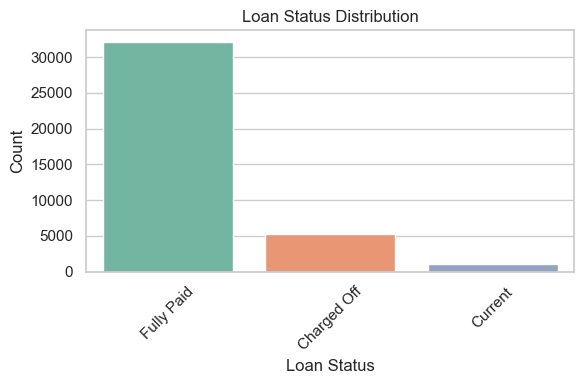

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', palette='Set2', order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Average Interest Rate by Grade

In [17]:
print(df.columns)


Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'month', 'year'],
      dtype='object')


C:\Users\Owner\AppData\Local\Temp\ipykernel_3508\1171050387.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='grade', y='int_rate', estimator=np.mean, palette='coolwarm')


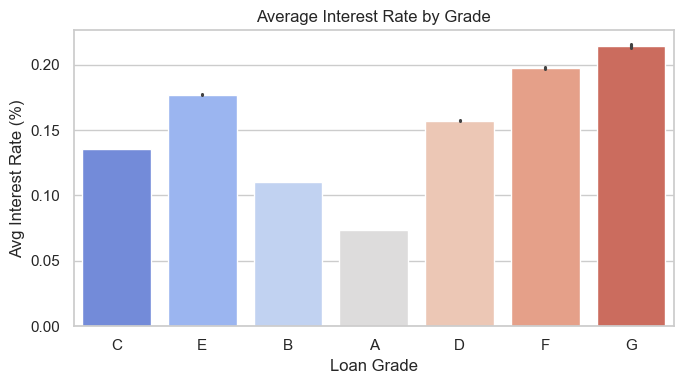

In [18]:
# If not done already, convert 'int_rate' from string to float
if df['int_rate'].dtype == object:
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# Plot: Average Interest Rate by Grade
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='grade', y='int_rate', estimator=np.mean, palette='coolwarm')
plt.title('Average Interest Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Avg Interest Rate (%)')
plt.tight_layout()
plt.show()


 4. Funded Amount vs Loan Status

C:\Users\Owner\AppData\Local\Temp\ipykernel_3508\2555269779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='viridis')


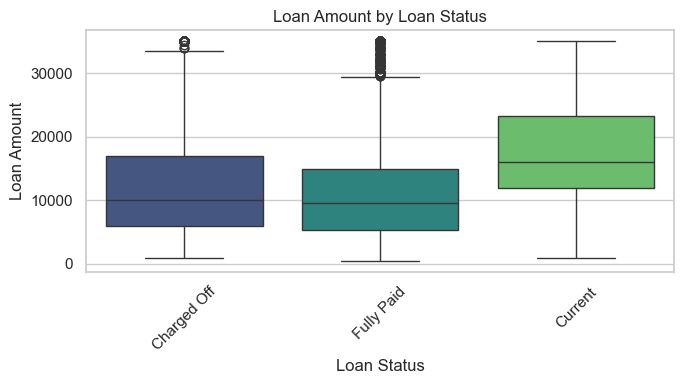

In [20]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='viridis')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 5. DTI Distribution (Debt-to-Income Ratio)

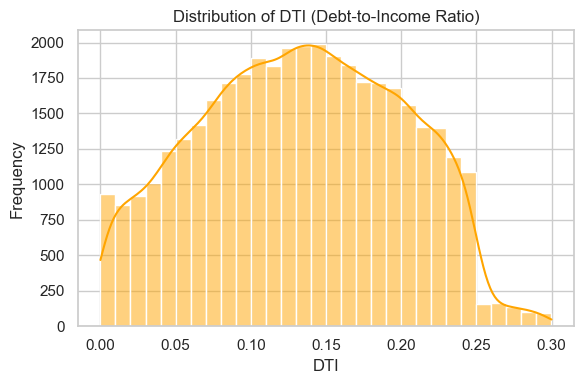

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['dti'], bins=30, kde=True, color='orange')
plt.title('Distribution of DTI (Debt-to-Income Ratio)')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


6. Monthly Loan Applications (2021)

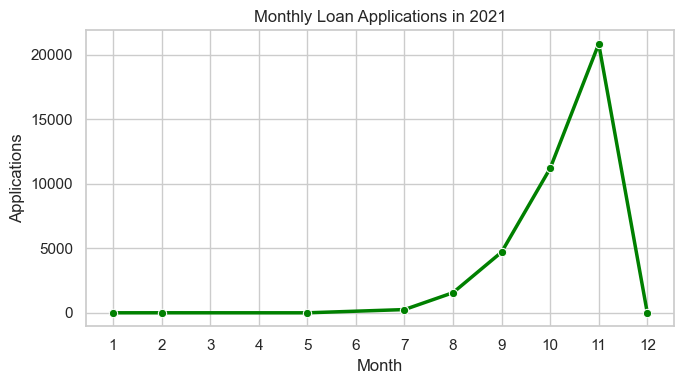

In [22]:
monthly_apps = df[df['year'] == 2021].groupby('month')['id'].nunique()

plt.figure(figsize=(7, 4))
sns.lineplot(x=monthly_apps.index, y=monthly_apps.values, marker='o', linewidth=2.5, color='green')
plt.title('Monthly Loan Applications in 2021')
plt.xlabel('Month')
plt.ylabel('Applications')
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.show()
